In [1]:
#imports de pacotes
#configuração de hiperparâmetros
#definição do hardware padrão utilizado


import torch
from torch import nn, optim

#Para cagerregamento de datasets utilizarei o pacote datasets do torchvision
#e o pacote transforms para a conversão para tensor
from torchvision import datasets
from torchvision import transforms

#DataLoader para criar batches de dados otimizando o processo de treinamento
from torch.utils.data import DataLoader

#Para visualização de dados utilizarei a biblioteca matplotlib e Numpy
import matplotlib.pyplot as plt
import numpy as np
#Para medir  o tempo de execução sera necessário o import time
import time

#Para adição de parâmetros e configurações que serão usados durante o processo de treinamento
args = {
    'batch_size': 100,
    'num_workers': 4,
    'num_classes': 10,
    'lr': 1e-3,
    'weight_decay': 5e-4,
    'num_epochs': 30
}

#Cast na GPU
if torch.cuda.is_available():
  args['device'] = torch.device('cuda')
else:
  args['device'] = torch.device('cpu')

print(args['device'])

cpu


In [2]:
#Carregamento do dataset MNIST, converte as imagens para tensores do PyTorch e
#imprime o número de amostras nos conjuntos de treinamento e teste.
train_set = datasets.MNIST('./',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

test_set = datasets.MNIST('./',
                           train=False,
                           transform=transforms.ToTensor(),
                           download=False)

print('Amostras de treino: ' + str(len(train_set)) + '\nAmostras de Teste:' + str(len(test_set)))

Amostras de treino: 60000
Amostras de Teste:10000


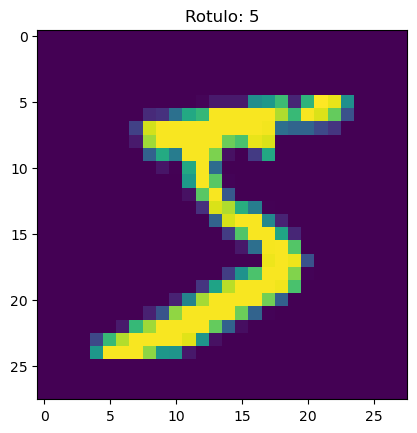

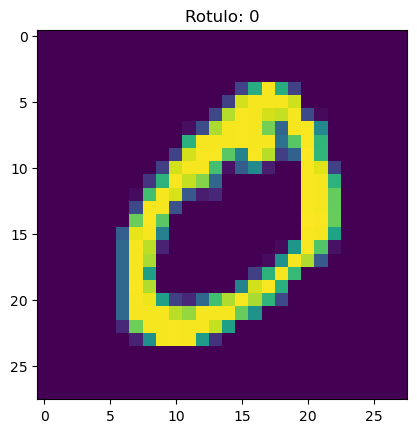

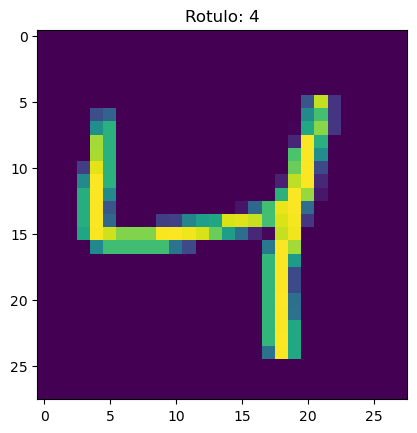

In [3]:
#Iteração do dataset para observação de algumas amostras e seus rótulos

for i in range(3):
  dado, rotulo = train_set[i]

  plt.figure()
  plt.imshow(dado[0])
  plt.title('Rotulo: '+ str(rotulo))

In [4]:
#para realizar um recorte aletório de 12x12
transforms.RandomCrop(12)

RandomCrop(size=(12, 12), padding=None)

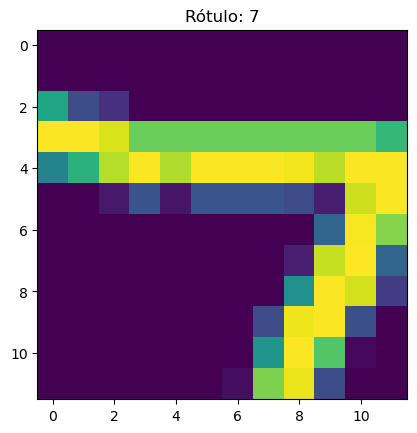

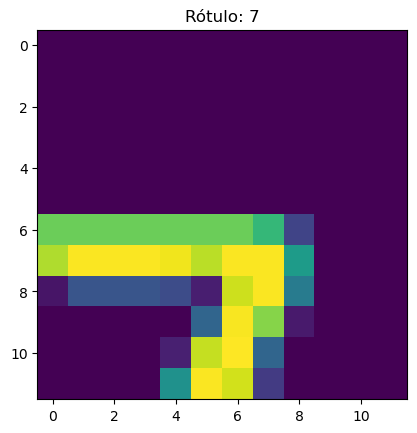

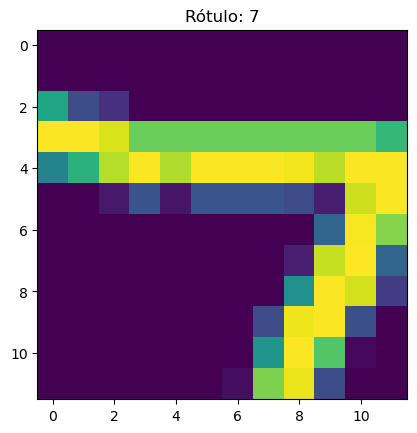

In [5]:
crop_set = datasets.MNIST('./',
                           train=False,
                           transform=transforms.RandomCrop(12),
                           download=False)

# Tuple (dado, rótulo)
for i in range(3):
  dado, rotulo = crop_set[0]

  plt.figure()
  plt.imshow(dado)
  plt.title('Rótulo: '+ str(rotulo))

In [6]:
#Carregamento dos dados em batches

train_loader = DataLoader(train_set,
                          batch_size=args['batch_size'],
                          shuffle=True,
                          num_workers=args['num_workers'])

test_loader = DataLoader(test_set,
                          batch_size=args['batch_size'],
                          shuffle=True,
                          num_workers=args['num_workers'])

torch.Size([100, 1, 28, 28]) torch.Size([100])


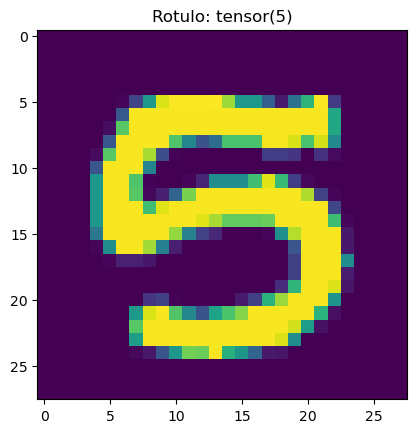

In [7]:

for batch in train_loader:

  dado, rotulo = batch
  print(dado.size(), rotulo.size())

  plt.imshow(dado[0][0])
  plt.title('Rotulo: '+ str(rotulo[0]) )
  break

In [8]:
#Implementando MLP com imagem com dimensionalidade (1,28,28)
#precisara linealiza-la antes de alimentar a rede

class MLP(nn.Module):

  def __init__(self, input_size, hidden_size, out_size):
    super(MLP, self).__init__()

    self.features  = nn.Sequential(
                      nn.Linear(input_size, hidden_size),
                      nn.ReLU(),
                      nn.Linear(hidden_size, hidden_size),
                      nn.ReLU()
                    )
    self.out     = nn.Linear(hidden_size, out_size)
    self.softmax = nn.Softmax()

  def forward(self, X):

    X = X.view(X.size(0), -1)

    feature = self.features(X)
    output  = self.out(feature)

    return output

input_size  = 28 * 28
hidden_size = 512
out_size    = 10 #classes

torch.manual_seed(42)
net = MLP(input_size, hidden_size, out_size).to(args['device']) #cast na GPU

In [9]:
#Definindo loss e otimizador
criterion = nn.CrossEntropyLoss().to(args['device'])
optimizer = optim.Adam(net.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])

In [11]:
# Definindo fluxo de treinamento para acompanhar a convergência do modelo:

train_losses = []
train_accuracies = []

for epoch in range(args['num_epochs']):
    start = time.time()
    epoch_loss = 0
    correct = 0
    total = 0

    net.train()  # coloca em modo de treino

    for batch in train_loader:
        dado, rotulo = batch
        dado = dado.to(args['device'])
        rotulo = rotulo.to(args['device'])

        optimizer.zero_grad()

        # Forward
        pred = net(dado)
        loss = criterion(pred, rotulo)

        # Acumula loss
        epoch_loss += loss.item()

        # Acumula acertos para acurácia
        _, predicted = torch.max(pred, 1)
        correct += (predicted == rotulo).sum().item()
        total += rotulo.size(0)

        # Backward
        loss.backward()
        optimizer.step()

    media_loss = epoch_loss / len(train_loader)
    acuracia = correct / total

    train_losses.append(media_loss)
    train_accuracies.append(acuracia)

    end = time.time()
    print(f"Época {epoch+1}, Loss: {media_loss:.4f}, Acurácia: {acuracia:.4f}, Tempo: {end-start:.2f}s")


Época 1, Loss: 0.2581, Acurácia: 0.9245, Tempo: 6.17s
Época 2, Loss: 0.1090, Acurácia: 0.9674, Tempo: 6.15s
Época 3, Loss: 0.0841, Acurácia: 0.9742, Tempo: 6.05s
Época 4, Loss: 0.0705, Acurácia: 0.9784, Tempo: 6.06s
Época 5, Loss: 0.0646, Acurácia: 0.9795, Tempo: 6.03s
Época 6, Loss: 0.0585, Acurácia: 0.9828, Tempo: 6.13s
Época 7, Loss: 0.0555, Acurácia: 0.9828, Tempo: 6.11s
Época 8, Loss: 0.0500, Acurácia: 0.9846, Tempo: 6.05s
Época 9, Loss: 0.0460, Acurácia: 0.9858, Tempo: 6.06s
Época 10, Loss: 0.0430, Acurácia: 0.9872, Tempo: 6.08s
Época 11, Loss: 0.0436, Acurácia: 0.9869, Tempo: 6.05s
Época 12, Loss: 0.0407, Acurácia: 0.9876, Tempo: 6.15s
Época 13, Loss: 0.0398, Acurácia: 0.9878, Tempo: 6.14s
Época 14, Loss: 0.0390, Acurácia: 0.9881, Tempo: 6.05s
Época 15, Loss: 0.0349, Acurácia: 0.9899, Tempo: 6.00s
Época 16, Loss: 0.0365, Acurácia: 0.9891, Tempo: 6.10s
Época 17, Loss: 0.0343, Acurácia: 0.9901, Tempo: 6.06s
Época 18, Loss: 0.0344, Acurácia: 0.9901, Tempo: 6.03s
Época 19, Loss: 0.0

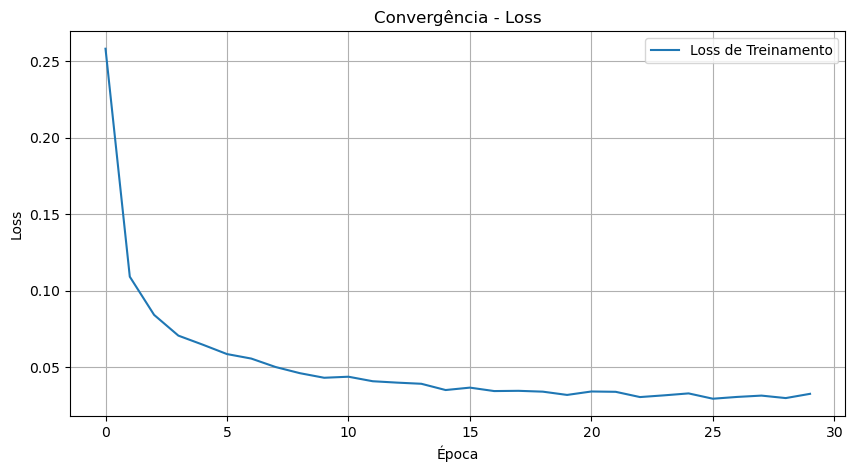

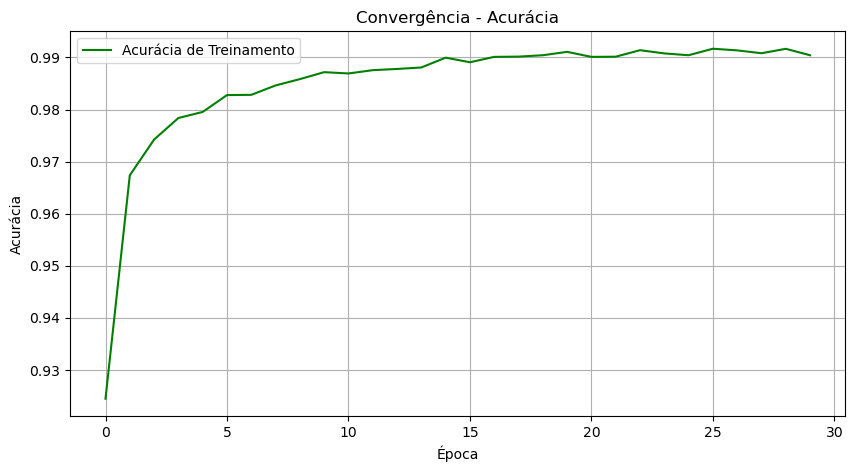

In [13]:
# Plot da perda
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Loss de Treinamento')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Convergência - Loss')
plt.grid(True)
plt.legend()
plt.show()

# Plot da acurácia
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Acurácia de Treinamento', color='green')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.title('Convergência - Acurácia')
plt.grid(True)
plt.legend()
plt.show()
